In [264]:
import keras
import os, shutil
import pandas
from random import sample
keras.__version__

'2.6.0'

In [265]:
os. getcwd() 
dir_train_mini = "./data/train_mini"
dirs_spp = os.listdir(dir_train_mini)
n_spp = len(dirs_spp) # 10,000 species directories
n_spp 

10000

In [266]:
i10 = sample(range(1,n_spp),10)
i10

[2871, 7512, 2767, 891, 3095, 6761, 3349, 7908, 5241, 589]

In [267]:
# show the first 2 species directory names
i2 = i10[0:2]
i2

for i in i2:
    print(os.path.basename(dirs_spp[i]))

01339_Animalia_Arthropoda_Insecta_Lepidoptera_Hesperiidae_Atalopedes_campestris
09176_Plantae_Tracheophyta_Magnoliopsida_Ranunculales_Papaveraceae_Eschscholzia_minutiflora


In [268]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/desik/github/lab4-ml-deeplearning/data/train_mini'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/desik/github/lab4-ml-deeplearning/data/train_mini_subset'
shutil.rmtree(base_dir)
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [269]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [270]:
speciesfolders = []
for i in i2:
    speciesfolders.append(os.path.basename(dirs_spp[i]))
    print(i)
speciesfolders

2871
7512


['01339_Animalia_Arthropoda_Insecta_Lepidoptera_Hesperiidae_Atalopedes_campestris',
 '09176_Plantae_Tracheophyta_Magnoliopsida_Ranunculales_Papaveraceae_Eschscholzia_minutiflora']

In [271]:
train_species_folders = []
validation_species_folders = []
test_species_folders = []
speciesfnames = []

n_train = 30
n_validation = 10
n_test = 10

i = 0
while i < len(i2):
    train_species_dir = os.path.join(train_dir, speciesfolders[i])
    train_species_folders.append(train_species_dir)
    if not os.path.exists(train_species_dir):
        os.mkdir(train_species_dir)
    validation_species_dir = os.path.join(validation_dir, speciesfolders[i])
    validation_species_folders.append(validation_species_dir)
    if not os.path.exists(validation_species_dir):
        os.mkdir(validation_species_dir)
    test_species_dir = os.path.join(test_dir, speciesfolders[i])
    test_species_folders.append(test_species_dir)
    if not os.path.exists(test_species_dir):
        os.mkdir(test_species_dir)
    n = 0
    for files in os.walk(os.path.join(original_dataset_dir, speciesfolders[i]), topdown=False):
       for name in files:
            n = n + 1
            if n > 2:
                speciesfnames.append(name)
    i = i + 1

In [262]:
train_species_folders

['/Users/desik/github/lab4-ml-deeplearning/data/train_mini_subset/train/08212_Plantae_Tracheophyta_Magnoliopsida_Fagales_Juglandaceae_Carya_illinoinensis',
 '/Users/desik/github/lab4-ml-deeplearning/data/train_mini_subset/train/03524_Animalia_Chordata_Aves_Columbiformes_Columbidae_Hemiphaga_novaeseelandiae']

In [274]:
i = 0
while i < len(i2):
    n = 0
    for fname in speciesfnames[i]:
        src = os.path.join(original_dataset_dir, speciesfolders[i], fname)
        if n < n_train:
            dst = os.path.join(train_species_folders[i], fname)
            n = n + 1
        elif n < n_train + n_validation:
            dst = os.path.join(validation_species_folders[i], fname)
            n = n + 1
        elif n < (n_train + n_validation + n_test):
            dst = os.path.join(test_species_folders[i], fname)
            n = n + 1
        shutil.copyfile(src, dst)
    i = i + 1




In [277]:
print('total training species 1 images:', len(os.listdir(train_species_folders[0])))

total training species 1 images: 30


In [279]:
print('total test species 2 images:', len(os.listdir(test_species_folders[1])))

total test species 2 images: 10


In [280]:
print('total validation species 2 images:', len(os.listdir(validation_species_folders[1])))

total validation species 2 images: 10


In [281]:
print('total test species 1 images:', len(os.listdir(test_species_folders[0])))

total test species 1 images: 10


In [180]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [181]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (4, 150, 150, 3)
labels batch shape: (4,)


In [182]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Flatten())


In [183]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [184]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [185]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [186]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 150, 150, 16)      64        
_________________________________________________________________
dense_31 (Dense)             (None, 150, 150, 16)      272       
_________________________________________________________________
dense_32 (Dense)             (None, 150, 150, 1)       17        
_________________________________________________________________
flatten_4 (Flatten)          (None, 22500)             0         
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [187]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/40
5/5 [==============================] - 1s 152ms/step - loss: 0.6919 - binary_accuracy: 0.5552 - val_loss: 0.6991 - val_binary_accuracy: 0.4972
Epoch 2/40
5/5 [==============================] - 0s 103ms/step - loss: 0.6850 - binary_accuracy: 0.6484 - val_loss: 0.6994 - val_binary_accuracy: 0.5000
Epoch 3/40
5/5 [==============================] - 0s 69ms/step - loss: 0.7064 - binary_accuracy: 0.4000 - val_loss: 0.6981 - val_binary_accuracy: 0.5000
Epoch 4/40
5/5 [==============================] - 0s 60ms/step - loss: 0.7011 - binary_accuracy: 0.4500 - val_loss: 0.6974 - val_binary_accuracy: 0.5000
Epoch 5/40
5/5 [==============================] - 1s 121ms/step - loss: 0.7049 - binary_accuracy: 0.3501 - val_loss: 0.6965 - val_binary_accuracy: 0.5053
Epoch 6/40
5/5 [==============================] - 0s 64ms/step - loss: 0.6973 - binary_accuracy: 0.4333 - val_loss: 0.6963 - val_binary_accuracy: 0.4968
Epoch 7/40
5/5 [==============================] - 1s 60ms/step - loss: 0.6948 -

In [188]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [189]:
model.save('2Species-binaryclassification-neuralnet.h5')

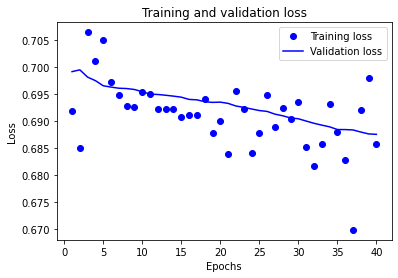

In [190]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [192]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [195]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)     

In [196]:
history = model.fit(
      train_generator,
      steps_per_epoch=5,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/40
5/5 [==============================] - 1s 162ms/step - loss: 0.7338 - acc: 0.4500 - val_loss: 0.6901 - val_acc: 0.5500
Epoch 2/40
5/5 [==============================] - 1s 102ms/step - loss: 0.6885 - acc: 0.5000 - val_loss: 0.7081 - val_acc: 0.5000
Epoch 3/40
5/5 [==============================] - 0s 94ms/step - loss: 0.6712 - acc: 0.6500 - val_loss: 0.7353 - val_acc: 0.5000
Epoch 4/40
5/5 [==============================] - 1s 116ms/step - loss: 0.7270 - acc: 0.6000 - val_loss: 0.7019 - val_acc: 0.5000
Epoch 5/40
5/5 [==============================] - 1s 106ms/step - loss: 0.7084 - acc: 0.4500 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 6/40
5/5 [==============================] - 0s 98ms/step - loss: 0.7008 - acc: 0.4000 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 7/40
5/5 [==============================] - 0s 94ms/step - loss: 0.6942 - acc: 0.5000 - val_loss: 0.6835 - val_acc: 0.5500
Epoch 8/40
5/5 [==============================] - 0s 77ms/step - loss: 0.6639 - acc: 0.7500 -

In [197]:
model.save('2Species-binaryclassification-convnet.h5')

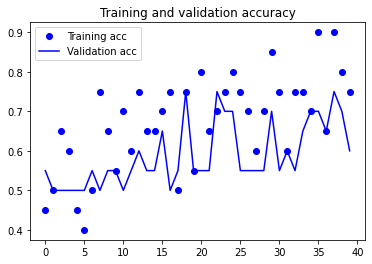

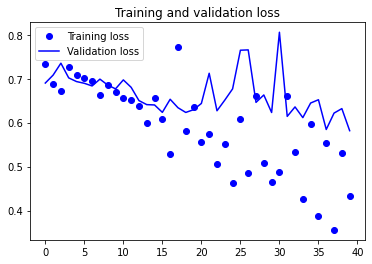

In [199]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()